In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm

K_MIN = 4
K_MAX = 7
D_MAX = 9

In [ ]:
@jax.jit
def encode_grid(grid):
    """One-hot encode the grid"""
    vals = jnp.arange(0, K_MAX + 1)
    vals = vals.at[0].set(-1)
    vals = vals[:, jnp.newaxis, jnp.newaxis]
    return jnp.astype(grid == vals, int)


@jax.jit
def decode_grid(grid):
    """Decode one-hot encoded grid."""
    vals = jnp.arange(0, K_MAX + 1)
    vals = vals.at[0].set(-1)
    vals = vals[:, jnp.newaxis, jnp.newaxis]
    return jnp.sum(vals * grid, axis=0)


def plot_grid(grid, ax, vmin=None, vmax=None):
    ax.grid(color="white", linewidth=2)
    ax.set_xticks(jnp.arange(-0.5, 9.5, 1), [])
    ax.set_yticks(jnp.arange(-0.5, 9.5, 1), [])
    ax.imshow(grid, vmin=vmin, vmax=vmax)

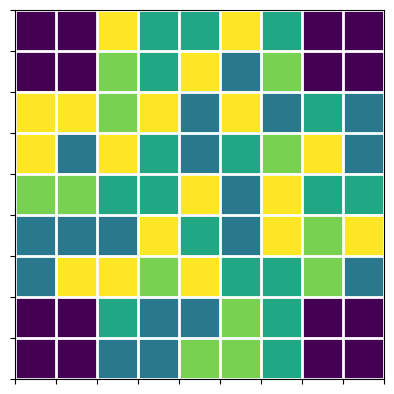

In [5]:
@jax.jit
def gererate_random_grid(key, k, mask):
    grid = jax.random.randint(key, (D_MAX, D_MAX), 1, k + 1)
    grid = grid * jnp.logical_xor(grid, mask) - mask
    return grid


key = jax.random.key(seed=42)

k = 4
mask = jnp.array([
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
])
grid = gererate_random_grid(key, k, mask)
plot_grid(grid, plt.gca(), vmin=-1, vmax=k)
plt.show()

In [89]:
# Masks for all possible matches.
filter_masks = jnp.array([
    [
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [0, 0, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
])

# Number of matched elements for each mask.
filter_vals = jnp.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3])

# Type of match for each mask.
filter_types = jnp.array([4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 0, 0])


@jax.jit
def remove_matches(grid: jnp.ndarray) -> tuple[jnp.ndarray, jnp.ndarray]:
    """Remove matches from the game grid.

    Args:
        grid: One-hot encoded game grid. The first dimension represents the
            color, second and third - the element presence.

    Returns:
        A tuple where the first element is the updated grid and the second array
        is the number of matches of each type.
    """
    grid_padded = jnp.pad(grid, 4)
    matches = jnp.zeros(5)

    # Iterate over each filter.
    for filter_mask, filter_val, filter_type in zip(filter_masks, filter_vals, filter_types):

        # Iterate over each grid cell skipping padding.
        for i in range(4, 13):
            for j in range(4, 13):

                # Grid under the filter.
                # grid_slice.shape = (11, 13, 13).
                grid_slice = grid_padded.at[5:, i:i + 5, j:j + 5].get()

                # Remove match from the slice if the filter is active.
                # is_filter_active.shape = (11, 1, 1).
                is_filter_active = jnp.sum(grid_slice * filter_mask, axis=[1, 2]) == filter_val
                is_filter_active = is_filter_active[:, jnp.newaxis, jnp.newaxis]

                # grid_slice.shape = (11, 13, 13).
                grid_slice = jnp.logical_xor(grid_slice, is_filter_active * filter_mask)

                # Increment match for each filter activation.
                matches = matches.at[filter_type].add(is_filter_active.sum())

                # Store grid with updated slice.
                grid_padded = grid_padded.at[5:, i:i + 5, j:j + 5].set(grid_slice)

    return grid_padded.at[4:-4, 4:13, 4:13].get(), matches

In [ ]:
@jax.jit
def collapse_grid(grid):
    for i in range(D_MAX):
        col_v = grid.at[:, i].get()

        col_i = jnp.arange(0, 9)
        col_w = jnp.astype(col_v == -1, jnp.int4) - jnp.astype(col_v == 0, jnp.int4)

        order = jnp.argsort(col_w, stable=True)
        col_i = col_i[order]
        col_v = col_v[order]

        l_mask = col_v != -1
        r_mask = col_v == -1

        col_i = (
            jnp.sort(col_i * l_mask + D_MAX * r_mask) * l_mask
            + col_i * r_mask
        )

        order = jnp.argsort(col_i, stable=True)
        col_v = col_v[order]
        grid = grid.at[:, i].set(col_v)
    
    return grid

In [213]:
@jax.jit
def refill_grid(key, grid, k):
    key, subkey = jax.random.split(key)
    random_grid = jax.random.randint(subkey, (D_MAX, D_MAX), 1, k + 1)
    return grid + random_grid * (grid == 0)

100%|██████████| 6/6 [01:04<00:00, 10.70s/it]


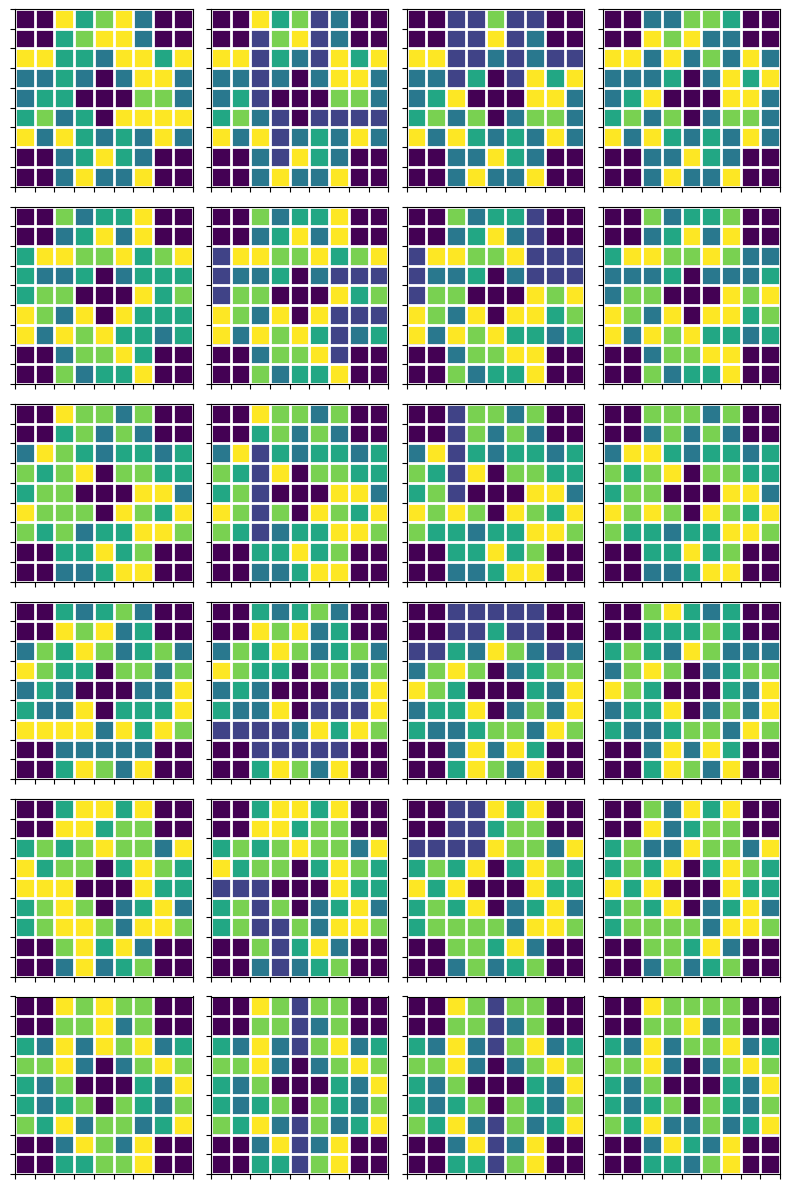

In [216]:
key = jax.random.key(seed=42)

k = 4
mask = jnp.array([
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
])

fig, axs = plt.subplots(6, 4, figsize=(8, 12))
for ax0, ax1, ax3, ax4 in tqdm(axs):
    key, subkey = jax.random.split(key)
    grid = gererate_random_grid(key, k, mask)
    plot_grid(grid, ax0, vmin=-1, vmax=4)

    grid, matches = remove_matches(encode_grid(grid))
    grid = decode_grid(grid)
    plot_grid(grid, ax1, vmin=-1, vmax=4)

    grid = collapse_grid(grid)
    plot_grid(grid, ax3, vmin=-1, vmax=4)

    key, subkey = jax.random.split(key)
    grid = refill_grid(key, grid, 4)
    plot_grid(grid, ax4, vmin=-1, vmax=4)

plt.tight_layout()
plt.show()